<a href="https://colab.research.google.com/github/swathimahadevan/project2-accent-aware-speech-recognition-system-/blob/main/%20Accent-Aware%20Speech%20Recognition%20System%20Using%20Deep%20Learning%20and%20Speaker%20Adaptation%20Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas librosa matplotlib numpy


In [2]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV file containing audio file paths
csv_file_path = '/content/cv-invalid.csv'  # Update this path as needed

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file at {csv_file_path} does not exist.")

# Load the CSV into a DataFrame
metadata = pd.read_csv(csv_file_path)

# Step 2: Inspect the column names to ensure correct access
print("Columns in the CSV:", metadata.columns.tolist())

# Assuming the column containing file paths is named 'filename'
# Strip any leading/trailing whitespace from column names
metadata.columns = metadata.columns.str.strip()

# Step 3: Define a function to extract MFCC features from an audio file
def extract_mfcc(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Compute MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Convert to dB scale for better visualization
        mfcc_db = librosa.power_to_db(mfcc**2)

        return mfcc_db, sr
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

# Step 4: Select an audio file from the DataFrame
sample_audio = metadata.iloc[0]  # Select the first row
audio_file_path = sample_audio['filename']  # Assuming 'filename' column contains the file paths

# Step 5: Extract MFCC features and visualize
mfcc_db, sr = extract_mfcc(audio_file_path)

if mfcc_db is not None:
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfcc_db, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC of {audio_file_path}')
    plt.show()
else:
    print("Failed to extract MFCC features.")


Columns in the CSV: ['filename', 'text', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'duration']
Error processing cv-invalid/sample-000000.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-000000.mp3'
Failed to extract MFCC features.


<ipython-input-2-f60de9780699>:29: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [3]:
import pandas as pd

# Load the dataset
metadata = pd.read_csv('/content/cv-invalid.csv')

# Display the first few rows
print(metadata.head())

# Display column names and data types
print(metadata.info())


                       filename  \
0  cv-invalid/sample-000000.mp3   
1  cv-invalid/sample-000001.mp3   
2  cv-invalid/sample-000002.mp3   
3  cv-invalid/sample-000003.mp3   
4  cv-invalid/sample-000004.mp3   

                                                text  up_votes  down_votes  \
0  revenge is not my style but obviously accident...         1          10   
1  it was bunched up and he had hardly thought of...         0           2   
2           then suddenly he noticed it with a start        10           4   
3      that's the point at which most people give up         0           1   
4                         you got someplace to sleep         0           1   

        age  gender  accent  duration  
0       NaN     NaN     NaN       NaN  
1  twenties    male      us       NaN  
2  thirties  female  canada       NaN  
3       NaN     NaN     NaN       NaN  
4       NaN     NaN     NaN       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25403 entries, 0 to 25402
Data

In [4]:
# Check for missing values
missing_values = metadata.isnull().sum()
print(missing_values)


filename          0
text              0
up_votes          0
down_votes        0
age           19552
gender        19535
accent        20395
duration      25403
dtype: int64


In [5]:
# Summary statistics
print(metadata.describe())


           up_votes    down_votes  duration
count  25403.000000  25403.000000       0.0
mean       1.862221      2.510137       NaN
std       25.784241     21.234095       NaN
min        0.000000      1.000000       NaN
25%        0.000000      1.000000       NaN
50%        0.000000      2.000000       NaN
75%        0.000000      3.000000       NaN
max     1613.000000   3065.000000       NaN


In [7]:
# Calculate word count
# Assuming 'text' is the correct column name for transcriptions
metadata['word_count'] = metadata['text'].apply(lambda x: len(str(x).split()))


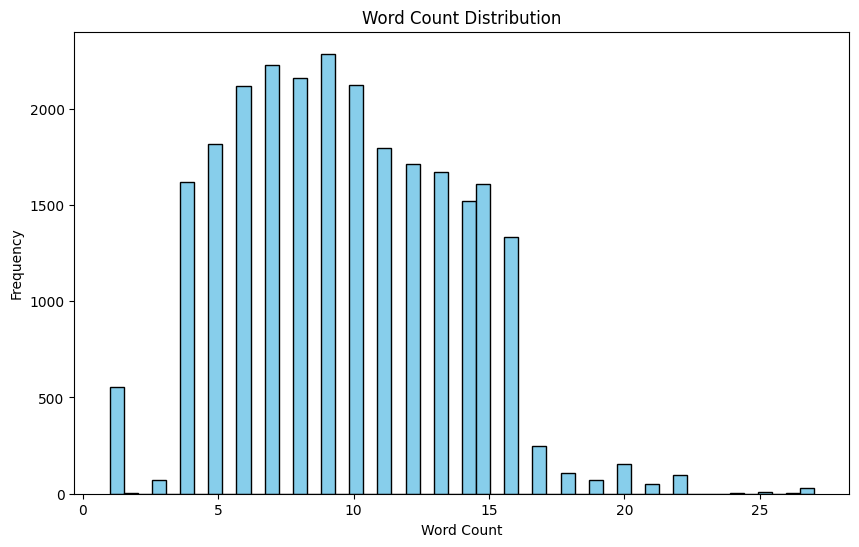

In [8]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(metadata['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [10]:
import string

# Preprocess text
# Assuming 'text' is the correct column for transcriptions
metadata['transcription_clean'] = metadata['text'].apply(lambda x: str(x).lower()) # Convert to string first to avoid errors with NaN values
metadata['transcription_clean'] = metadata['transcription_clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [11]:
from collections import Counter

# Tokenize and count words
all_words = ' '.join(metadata['transcription_clean']).split()
word_counts = Counter(all_words)

# Get the 20 most common words
common_words = word_counts.most_common(20)


<ipython-input-12-6382de32695d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


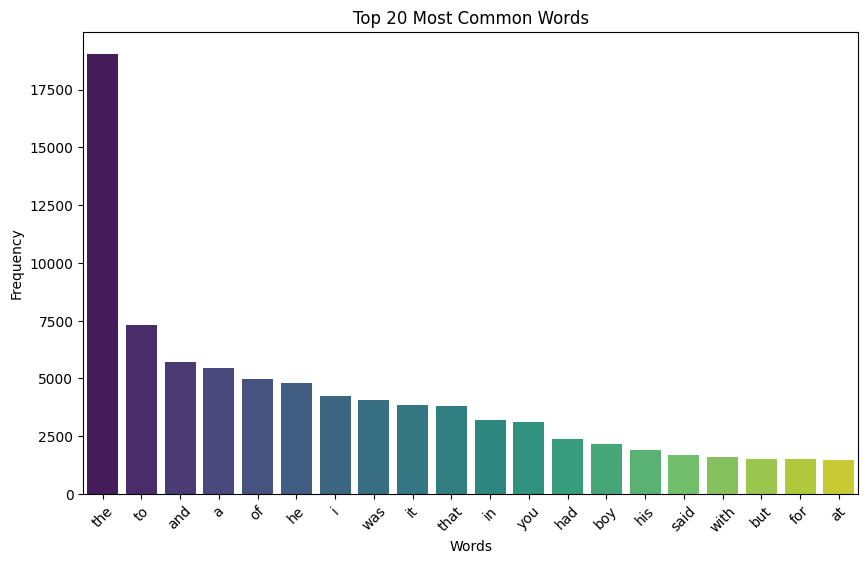

In [12]:
import seaborn as sns

# Prepare data for plotting
words, counts = zip(*common_words)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


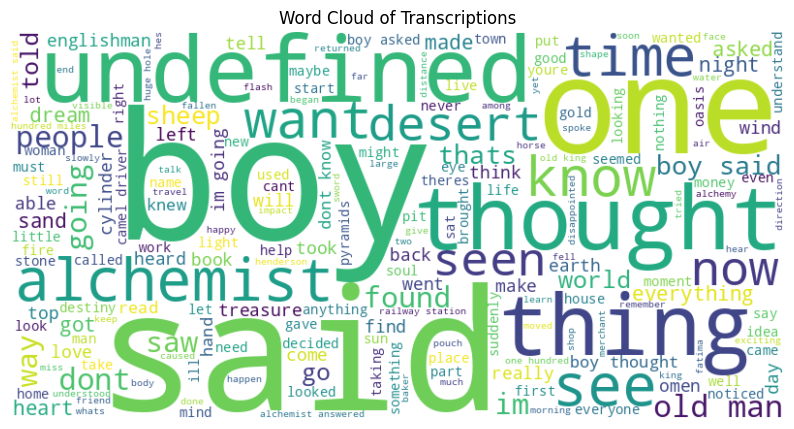

In [13]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Transcriptions')
plt.show()


In [14]:
import librosa

# Function to get audio duration
def get_audio_duration(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Apply function to get durations
metadata['audio_duration'] = metadata['filename'].apply(get_audio_duration)


<ipython-input-14-45489c95dc44>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Streaming output truncated to the last 5000 lines.
Error processing cv-invalid/sample-020403.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020403.mp3'
Error processing cv-invalid/sample-020404.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020404.mp3'
Error processing cv-invalid/sample-020405.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020405.mp3'
Error processing cv-invalid/sample-020406.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020406.mp3'
Error processing cv-invalid/sample-020407.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020407.mp3'
Error processing cv-invalid/sample-020408.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020408.mp3'
Error processing cv-invalid/sample-020409.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020409.mp3'
Error processing cv-invalid/sample-020410.mp3: [Errno 2] No such file or directory: 'cv-invalid/sample-020410.mp3'
Error processing cv-invalid/s

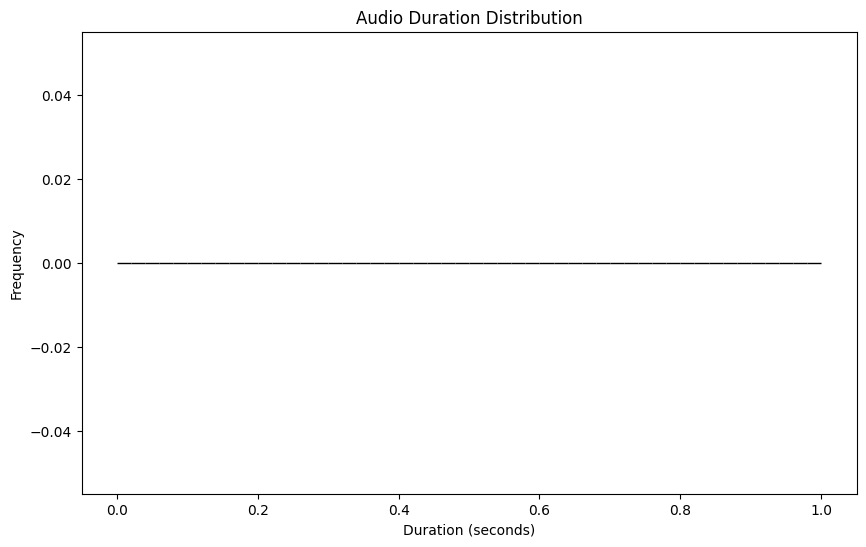

In [15]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(metadata['audio_duration'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


<Axes: >

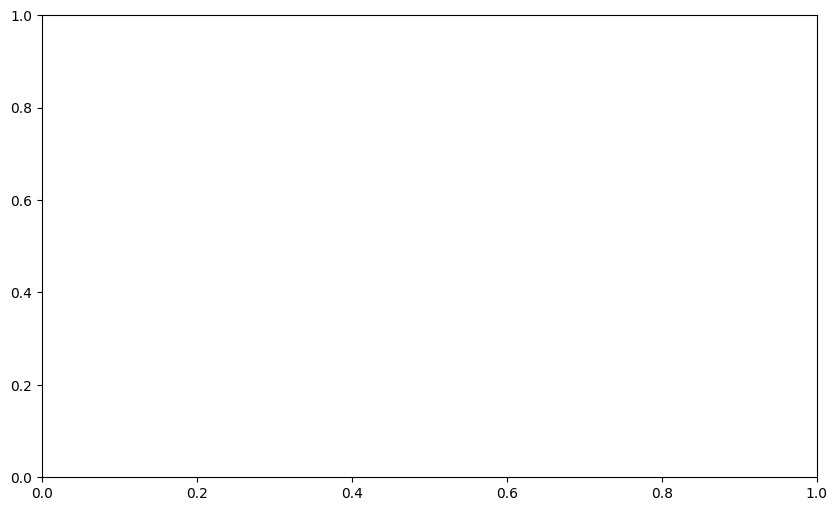

In [18]:
# Scatter plot
# Scatter plot
# Scatter plot
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot()
#::contentReference[oaicite:121]{index=121} # This line is a comment and not valid Python, so I'm leaving it as is.

